# Data Cleaning, Feature Engineering, and Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Load the Dataset

In [2]:
file_path = "./data/gov/final_merged_with_interest.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,קומות במבנה,שנת בנייה,תאריך עסקה,כתובת,גוש/חלקה/תת-חלקה,סוג נכס,חדרים,קומה,"מ""ר",מחיר,שכונה,ריבית בנק ישראל
0,0.0,0.0,2025-02-04,ללא כתובת,11188-61-47,דירה בבית קומות,3,שישית,95,"1,400,000 ₪",רמת ויזניץ,0.045
1,3.0,1970.0,2025-02-02,"האר""י 6",11188-118-19,דירה בבית קומות,4,ראשונה,75.3,"1,250,000 ₪",רמת ויזניץ,0.045
2,22.0,1970.0,2025-01-28,הרב קניאל 11,10870-98-35,דירה בבית קומות,3,שישית,67.8,"1,090,000 ₪",רמת ויזניץ,0.045
3,22.0,1970.0,2020-09-25,הרב קניאל 11,10870-98-35,דירה בבית קומות,3,שישית,67.8,"700,000 ₪",רמת ויזניץ,0.100
4,22.0,1970.0,2025-01-28,הרב קניאל 11,10870-98-104,דירה בבית קומות,3,שבע עשרה,68.9,"1,178,000 ₪",רמת ויזניץ,0.045


## Identify Missing Values

In [3]:
# Define custom missing value conditions
df['קומות במבנה'] = df['קומות במבנה'].replace(0, pd.NA)
df['שנת בנייה'] = df['שנת בנייה'].replace(0, pd.NA)
df['כתובת'] = df['כתובת'].replace('ללא כתובת', pd.NA)

# Count missing values per column
missing_counts = df.isna().sum()
missing_counts

קומות במבנה         1610
שנת בנייה           1077
תאריך עסקה            87
כתובת                868
גוש/חלקה/תת-חלקה       0
סוג נכס                0
חדרים                  0
קומה                   0
מ"ר                    0
מחיר                  15
שכונה                  0
ריבית בנק ישראל       87
dtype: int64

### We are not treating missing values yet, but they are identified.

## Extract Year and Month from Transaction Date

In [4]:
# Convert 'תאריך עסקה' to datetime
df['תאריך עסקה'] = pd.to_datetime(df['תאריך עסקה'], errors='coerce')
df['שנת עסקה'] = df['תאריך עסקה'].dt.year
df['חודש עסקה'] = df['תאריך עסקה'].dt.month

# Drop original date column
df.drop(columns=['תאריך עסקה'], inplace=True)

df.head()

,קומות במבנה,שנת בנייה,כתובת,גוש/חלקה/תת-חלקה,סוג נכס,חדרים,קומה,"מ""ר",מחיר,שכונה,ריבית בנק ישראל,שנת עסקה,חודש עסקה
0,<NA>,<NA>,<NA>,11188-61-47,דירה בבית קומות,3,שישית,95,"1,400,000 ₪",רמת ויזניץ,0.045,2025.0,2.0
1,3.0,1970.0,"האר""י 6",11188-118-19,דירה בבית קומות,4,ראשונה,75.3,"1,250,000 ₪",רמת ויזניץ,0.045,2025.0,2.0
2,22.0,1970.0,הרב קניאל 11,10870-98-35,דירה בבית קומות,3,שישית,67.8,"1,090,000 ₪",רמת ויזניץ,0.045,2025.0,1.0
3,22.0,1970.0,הרב קניאל 11,10870-98-35,דירה בבית קומות,3,שישית,67.8,"700,000 ₪",רמת ויזניץ,0.100,2020.0,9.0
4,22.0,1970.0,הרב קניאל 11,10870-98-104,דירה בבית קומות,3,שבע עשרה,68.9,"1,178,000 ₪",רמת ויזניץ,0.045,2025.0,1.0


## Split Address Column into Street and House Number

In [5]:
# Split address into street and house number
df[['רחוב', 'מספר בית']] = df['כתובת'].str.extract(r'(.+?)\s(\d+)$')
df.drop(columns=['כתובת'], inplace=True)
df.head()

,קומות במבנה,שנת בנייה,גוש/חלקה/תת-חלקה,סוג נכס,חדרים,קומה,"מ""ר",מחיר,שכונה,ריבית בנק ישראל,שנת עסקה,חודש עסקה,רחוב,מספר בית
0,<NA>,<NA>,11188-61-47,דירה בבית קומות,3,שישית,95,"1,400,000 ₪",רמת ויזניץ,0.045,2025.0,2.0,NaN,NaN
1,3.0,1970.0,11188-118-19,דירה בבית קומות,4,ראשונה,75.3,"1,250,000 ₪",רמת ויזניץ,0.045,2025.0,2.0,"האר""י",6
2,22.0,1970.0,10870-98-35,דירה בבית קומות,3,שישית,67.8,"1,090,000 ₪",רמת ויזניץ,0.045,2025.0,1.0,הרב קניאל,11
3,22.0,1970.0,10870-98-35,דירה בבית קומות,3,שישית,67.8,"700,000 ₪",רמת ויזניץ,0.100,2020.0,9.0,הרב קניאל,11
4,22.0,1970.0,10870-98-104,דירה בבית קומות,3,שבע עשרה,68.9,"1,178,000 ₪",רמת ויזניץ,0.045,2025.0,1.0,הרב קניאל,11


## Convert Floor Column to Numeric

In [6]:
floor_mapping = {
    'קרקע': 0, 'ראשונה': 1, 'שנייה': 2, 'שלישית': 3, 'רביעית': 4,
    'חמישית': 5, 'שישית': 6, 'שביעית': 7, 'שמינית': 8, 'תשיעית': 9,
    'עשירית': 10, 'אחת עשרה': 11, 'שתיים עשרה': 12, 'שלוש עשרה': 13,
    'ארבע עשרה': 14, 'חמש עשרה': 15, 'שש עשרה': 16, 'שבע עשרה': 17, 
    'שמונה עשרה': 18, 'תשע עשרה': 19, 'עשרים': 20
}
df['קומה'] = df['קומה'].map(floor_mapping)
df.head()

,קומות במבנה,שנת בנייה,גוש/חלקה/תת-חלקה,סוג נכס,חדרים,קומה,"מ""ר",מחיר,שכונה,ריבית בנק ישראל,שנת עסקה,חודש עסקה,רחוב,מספר בית
0,<NA>,<NA>,11188-61-47,דירה בבית קומות,3,6.0,95,"1,400,000 ₪",רמת ויזניץ,0.045,2025.0,2.0,NaN,NaN
1,3.0,1970.0,11188-118-19,דירה בבית קומות,4,1.0,75.3,"1,250,000 ₪",רמת ויזניץ,0.045,2025.0,2.0,"האר""י",6
2,22.0,1970.0,10870-98-35,דירה בבית קומות,3,6.0,67.8,"1,090,000 ₪",רמת ויזניץ,0.045,2025.0,1.0,הרב קניאל,11
3,22.0,1970.0,10870-98-35,דירה בבית קומות,3,6.0,67.8,"700,000 ₪",רמת ויזניץ,0.100,2020.0,9.0,הרב קניאל,11
4,22.0,1970.0,10870-98-104,דירה בבית קומות,3,17.0,68.9,"1,178,000 ₪",רמת ויזניץ,0.045,2025.0,1.0,הרב קניאל,11


## Convert Property Type to Numeric

In [7]:
df['סוג נכס'] = df['סוג נכס'].astype('category').cat.codes
df.head()

,קומות במבנה,שנת בנייה,גוש/חלקה/תת-חלקה,סוג נכס,חדרים,קומה,"מ""ר",מחיר,שכונה,ריבית בנק ישראל,שנת עסקה,חודש עסקה,רחוב,מספר בית
0,<NA>,<NA>,11188-61-47,5,3,6.0,95,"1,400,000 ₪",רמת ויזניץ,0.045,2025.0,2.0,NaN,NaN
1,3.0,1970.0,11188-118-19,5,4,1.0,75.3,"1,250,000 ₪",רמת ויזניץ,0.045,2025.0,2.0,"האר""י",6
2,22.0,1970.0,10870-98-35,5,3,6.0,67.8,"1,090,000 ₪",רמת ויזניץ,0.045,2025.0,1.0,הרב קניאל,11
3,22.0,1970.0,10870-98-35,5,3,6.0,67.8,"700,000 ₪",רמת ויזניץ,0.100,2020.0,9.0,הרב קניאל,11
4,22.0,1970.0,10870-98-104,5,3,17.0,68.9,"1,178,000 ₪",רמת ויזניץ,0.045,2025.0,1.0,הרב קניאל,11


## Convert Price to Numeric

In [8]:
df['מחיר'] = df['מחיר'].str.replace('[^\d]', '', regex=True).astype(float)
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\IMOE001\AppData\Local\Temp\ipykernel_7732\1309275127.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['מחיר'] = df['מחיר'].str.replace('[^\d]', '', regex=True).astype(float)


,קומות במבנה,שנת בנייה,גוש/חלקה/תת-חלקה,סוג נכס,חדרים,קומה,"מ""ר",מחיר,שכונה,ריבית בנק ישראל,שנת עסקה,חודש עסקה,רחוב,מספר בית
0,<NA>,<NA>,11188-61-47,5,3,6.0,95,1400000.0,רמת ויזניץ,0.045,2025.0,2.0,NaN,NaN
1,3.0,1970.0,11188-118-19,5,4,1.0,75.3,1250000.0,רמת ויזניץ,0.045,2025.0,2.0,"האר""י",6
2,22.0,1970.0,10870-98-35,5,3,6.0,67.8,1090000.0,רמת ויזניץ,0.045,2025.0,1.0,הרב קניאל,11
3,22.0,1970.0,10870-98-35,5,3,6.0,67.8,700000.0,רמת ויזניץ,0.100,2020.0,9.0,הרב קניאל,11
4,22.0,1970.0,10870-98-104,5,3,17.0,68.9,1178000.0,רמת ויזניץ,0.045,2025.0,1.0,הרב קניאל,11


## Convert Neighborhood to Numeric

In [9]:
df['שכונה'] = df['שכונה'].astype('category').cat.codes
df.head()

,קומות במבנה,שנת בנייה,גוש/חלקה/תת-חלקה,סוג נכס,חדרים,קומה,"מ""ר",מחיר,שכונה,ריבית בנק ישראל,שנת עסקה,חודש עסקה,רחוב,מספר בית
0,<NA>,<NA>,11188-61-47,5,3,6.0,95,1400000.0,8,0.045,2025.0,2.0,NaN,NaN
1,3.0,1970.0,11188-118-19,5,4,1.0,75.3,1250000.0,8,0.045,2025.0,2.0,"האר""י",6
2,22.0,1970.0,10870-98-35,5,3,6.0,67.8,1090000.0,8,0.045,2025.0,1.0,הרב קניאל,11
3,22.0,1970.0,10870-98-35,5,3,6.0,67.8,700000.0,8,0.100,2020.0,9.0,הרב קניאל,11
4,22.0,1970.0,10870-98-104,5,3,17.0,68.9,1178000.0,8,0.045,2025.0,1.0,הרב קניאל,11


## Split Data into Features (X) and Target (y)

In [ ]:
# Define target and features
y = df['מחיר']
X = df.drop(columns=['מחיר'])

(  קומות במבנה שנת בנייה גוש/חלקה/תת-חלקה  סוג נכס חדרים  קומה   מ"ר  שכונה  \
 0        <NA>      <NA>      11188-61-47        5     3   6.0    95      8   
 1         3.0    1970.0     11188-118-19        5     4   1.0  75.3      8   
 2        22.0    1970.0      10870-98-35        5     3   6.0  67.8      8   
 3        22.0    1970.0      10870-98-35        5     3   6.0  67.8      8   
 4        22.0    1970.0     10870-98-104        5     3  17.0  68.9      8   
 
    ריבית בנק ישראל  שנת עסקה  חודש עסקה       רחוב מספר בית  
 0            0.045    2025.0        2.0        NaN      NaN  
 1            0.045    2025.0        2.0      האר"י        6  
 2            0.045    2025.0        1.0  הרב קניאל       11  
 3            0.100    2020.0        9.0  הרב קניאל       11  
 4            0.045    2025.0        1.0  הרב קניאל       11  ,
 0    1400000.0
 1    1250000.0
 2    1090000.0
 3     700000.0
 4    1178000.0
 Name: מחיר, dtype: float64)

## Exploratory Data Analysis

In [11]:
# Basic stats
print("Features Info:")
print(X.info())

print("\nTarget Description:")
print(y.describe())

Features Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14105 entries, 0 to 14104
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   קומות במבנה       12495 non-null  object 
 1   שנת בנייה         13028 non-null  object 
 2   גוש/חלקה/תת-חלקה  14105 non-null  object 
 3   סוג נכס           14105 non-null  int8   
 4   חדרים             14105 non-null  object 
 5   קומה              9119 non-null   float64
 6   מ"ר               14105 non-null  object 
 7   שכונה             14105 non-null  int8   
 8   ריבית בנק ישראל   14018 non-null  float64
 9   שנת עסקה          14018 non-null  float64
 10  חודש עסקה         14018 non-null  float64
 11  רחוב              13237 non-null  object 
 12  מספר בית          13237 non-null  object 
dtypes: float64(4), int8(2), object(7)
memory usage: 1.2+ MB
None

Target Description:
count    1.409000e+04
mean     1.143700e+06
std      1.744698e+06
min      1.000000e

### Correlation between Features and Target

In [12]:
# Calculate correlations
correlations = pd.concat([X, y], axis=1).corr(numeric_only=True)['מחיר'].sort_values(ascending=False)
print(correlations)

מחיר               1.000000
שנת עסקה           0.173982
סוג נכס            0.093620
ריבית בנק ישראל    0.037867
חודש עסקה         -0.011385
קומה              -0.015920
שכונה             -0.152278
Name: מחיר, dtype: float64


### Visual Exploration of Top Correlated Features

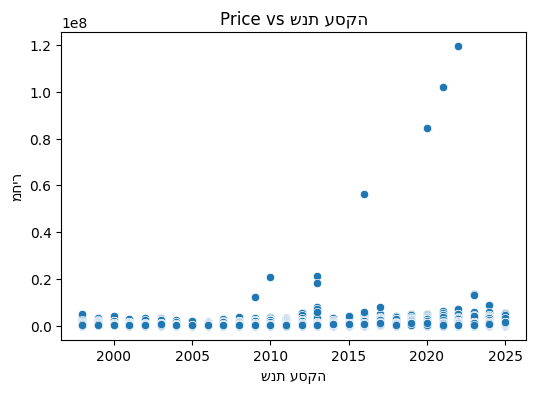

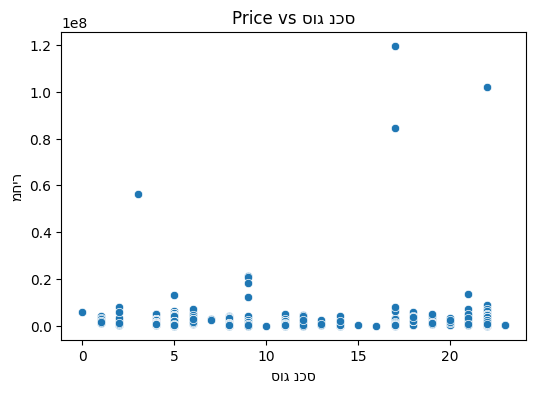

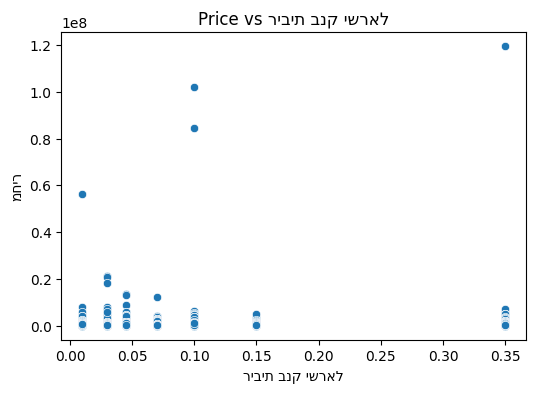

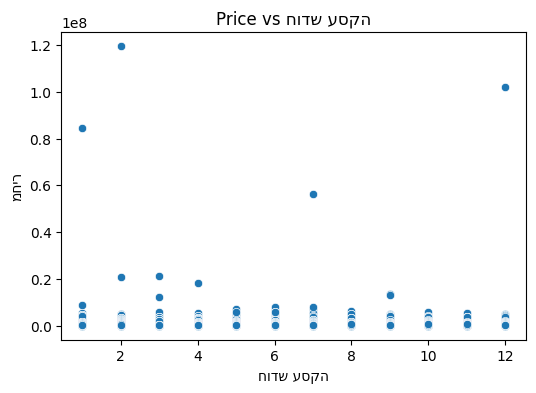

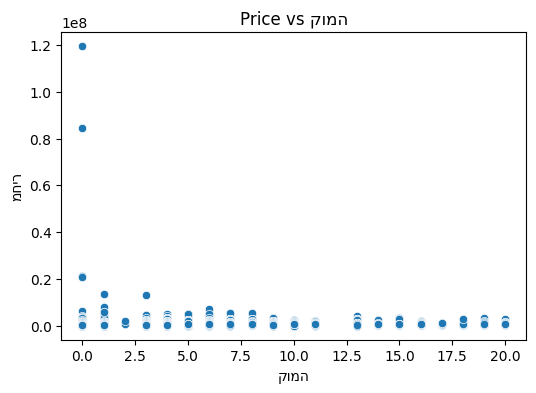

In [13]:
top_features = correlations.index[1:6]  # skip 'מחיר' itself

for feature in top_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=feature, y='מחיר', data=pd.concat([X, y], axis=1))
    plt.title(f"Price vs {feature}")
    plt.show()

## Outlier Detection and Handling

In [14]:
# Detect outliers in target using IQR
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print bounds
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

# Filter out outliers
mask = (y >= lower_bound) & (y <= upper_bound)
X_clean = X[mask]
y_clean = y[mask]

print(f"Removed {len(y) - len(y_clean)} outliers")

Lower bound: -675000.0, Upper bound: 2725000.0
Removed 438 outliers


## Normalization of Features

In [15]:
# For simplicity we will normalize all numeric features except year/month which are ordinal
numeric_features = X_clean.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
X_scaled = X_clean.copy()
X_scaled[numeric_features] = scaler.fit_transform(X_clean[numeric_features])

X_scaled.head()

,קומות במבנה,שנת בנייה,גוש/חלקה/תת-חלקה,סוג נכס,חדרים,קומה,"מ""ר",שכונה,ריבית בנק ישראל,שנת עסקה,חודש עסקה,רחוב,מספר בית
0,<NA>,<NA>,11188-61-47,5,3,0.672513,95,8,-0.295482,1.667580,-1.287433,NaN,NaN
1,3.0,1970.0,11188-118-19,5,4,-0.757925,75.3,8,-0.295482,1.667580,-1.287433,"האר""י",6
2,22.0,1970.0,10870-98-35,5,3,0.672513,67.8,8,-0.295482,1.667580,-1.575837,הרב קניאל,11
3,22.0,1970.0,10870-98-35,5,3,0.672513,67.8,8,0.435717,0.972904,0.731394,הרב קניאל,11
4,22.0,1970.0,10870-98-104,5,3,3.819478,68.9,8,-0.295482,1.667580,-1.575837,הרב קניאל,11


## Train-Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_clean, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (10933, 13)
Test shape: (2734, 13)
